# MNIST with MLP (1000 neurons in hidden layer)
## Pre-processing

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\Chiu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [3]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

## Build the model

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

### Hidden Layer (1000 neurons)

In [8]:
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))

### Output Layer

In [9]:
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [10]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


## Start the training

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=200,
                          verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 6s - loss: 0.2945 - acc: 0.9154 - val_loss: 0.1530 - val_acc: 0.9561
Epoch 2/10
 - 5s - loss: 0.1181 - acc: 0.9658 - val_loss: 0.1075 - val_acc: 0.9676
Epoch 3/10
 - 5s - loss: 0.0759 - acc: 0.9781 - val_loss: 0.0924 - val_acc: 0.9728
Epoch 4/10
 - 5s - loss: 0.0514 - acc: 0.9856 - val_loss: 0.0878 - val_acc: 0.9742
Epoch 5/10
 - 5s - loss: 0.0359 - acc: 0.9900 - val_loss: 0.0755 - val_acc: 0.9763
Epoch 6/10
 - 5s - loss: 0.0255 - acc: 0.9934 - val_loss: 0.0741 - val_acc: 0.9778
Epoch 7/10
 - 5s - loss: 0.0183 - acc: 0.9960 - val_loss: 0.0723 - val_acc: 0.9800
Epoch 8/10
 - 5s - loss: 0.0131 - acc: 0.9972 - val_loss: 0.0715 - val_acc: 0.9784
Epoch 9/10
 - 5s - loss: 0.0088 - acc: 0.9986 - val_loss: 0.0732 - val_acc: 0.9791
Epoch 10/10
 - 5s - loss: 0.0063 - acc: 0.9992 - val_loss: 0.0702 - val_acc: 0.9808


In [15]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

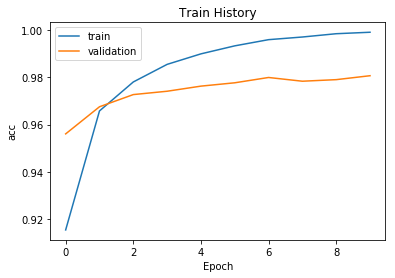

In [16]:
show_train_history(train_history, 'acc', 'val_acc')

In [17]:
scores=model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=', scores[1])

10000/10000 [==============================] - 1s 61us/step

accuracy= 0.9796
